### Important Library :

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [140]:
# Define the RGB values for the colors
colors = ['#ece2f0', '#a6bddb', '#1c9099']

# Create a custom colormap
custom_cmap = LinearSegmentedColormap.from_list('custom_colormap', colors)

### Loading dataset:

In [141]:
df = pd.read_csv(r'D:\Github\Stock_Market_Performance_Analysis_(NIFTY500)_using_Python\NIFTY_500\nifty_500.csv')

### Display first few rows:


In [142]:
print(display(df.head(10)))


,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,3M India Ltd.,3MINDIA,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Aarti Drugs Ltd.,AARTIDRUGS,Healthcare,EQ,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Aavas Financiers Ltd.,AAVAS,Financial Services,EQ,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,ABB India Ltd.,ABB,Capital Goods,EQ,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Abbott India Ltd.,ABBOTINDIA,Healthcare,EQ,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84
5,Aditya Birla Capital Ltd.,ABCAPITAL,Financial Services,EQ,89.00,90.60,88.35,89.40,90.25,0.85,0.95,2401323,2.151826e+08,139.20,85.60,-23.75,-11.57
6,Aditya Birla Fashion and Retail Ltd.,ABFRL,Consumer Services,EQ,235.60,243.50,235.60,237.05,242.20,5.15,2.17,1014277,2.435482e+08,322.00,189.35,9.87,-12.62
7,Aditya Birla Sun Life AMC Ltd.,ABSLAMC,Financial Services,EQ,400.05,406.70,400.00,400.05,405.90,5.85,1.46,34489,1.390183e+07,722.90,375.00,-,-5.09
8,ACC Ltd.,ACC,Construction Materials,EQ,2122.95,2174.00,2122.95,2121.95,2171.70,49.75,2.34,284645,6.136206e+08,2589.00,1900.00,5.32,-3.48
9,Adani Enterprises Ltd.,ADANIENT,Metals & Mining,EQ,2189.90,2242.00,2138.25,2190.90,2229.25,38.35,1.75,2141743,4.695579e+09,2420.95,1332.75,45.33,1.08


None


### Droping Symbol and Series Columns

In [143]:
# Drop irrelevant columns
df = df.drop(columns=['Series', 'Symbol'])

### Checking Missing Value:

In [144]:
print(df.isnull().sum())

Company Name                 0
Industry                     0
Open                         0
High                         0
Low                          0
Previous Close               0
Last Traded Price            0
Change                       0
Percentage Change            0
Share Volume                 0
Value (Indian Rupee)         0
52 Week High                 0
52 Week Low                  0
365 Day Percentage Change    0
30 Day Percentage Change     0
dtype: int64


### Checking Data Type:

In [145]:
print(df.dtypes)

Company Name                  object
Industry                      object
Open                         float64
High                         float64
Low                          float64
Previous Close               float64
Last Traded Price            float64
Change                        object
Percentage Change             object
Share Volume                   int64
Value (Indian Rupee)         float64
52 Week High                 float64
52 Week Low                  float64
365 Day Percentage Change     object
30 Day Percentage Change      object
dtype: object


### Checking Unique value:

In [146]:
df.nunique()


Company Name                 501
Industry                      21
Open                         492
High                         495
Low                          493
Previous Close               495
Last Traded Price            493
Change                       372
Percentage Change            354
Share Volume                 501
Value (Indian Rupee)         501
52 Week High                 497
52 Week Low                  494
365 Day Percentage Change    441
30 Day Percentage Change     458
dtype: int64

In [147]:
# Generate synthetic date range based on the number of rows in the dataset
start_date = '2023-01-01'
end_date = '2023-12-31'
date_range = pd.date_range(start=start_date, end=end_date, periods=len(df))

# Add the synthetic date range to the dataframe
df['Date'] = date_range

# Check the updated dataframe
print(display(df.head()))


,Company Name,Industry,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change,Date
0,3M India Ltd.,Diversified,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22,2023-01-01 00:00:00.000
1,Aarti Drugs Ltd.,Healthcare,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10,2023-01-01 17:28:19.200
2,Aavas Financiers Ltd.,Financial Services,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39,2023-01-02 10:56:38.400
3,ABB India Ltd.,Capital Goods,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21,2023-01-03 04:24:57.600
4,Abbott India Ltd.,Healthcare,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84,2023-01-03 21:53:16.800


None


### Summary Statistic For numarical Columns:

In [148]:
print(display(df.describe()))

,Open,High,Low,Previous Close,Last Traded Price,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,Date
count,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02,5.010000e+02,501.000000,501.000000,501
mean,1525.904491,1553.804990,1504.042415,1528.061277,1536.925449,2.580350e+06,8.635146e+08,2182.632196,1281.628982,2023-07-02 00:00:00
min,6.750000,6.950000,6.700000,6.850000,6.800000,1.507000e+03,2.587223e+06,13.100000,4.550000,2023-01-01 00:00:00
25%,215.300000,221.550000,210.600000,217.200000,214.650000,7.740500e+04,4.502265e+07,328.700000,166.800000,2023-04-02 00:00:00
50%,551.100000,569.100000,547.000000,554.750000,563.000000,3.296100e+05,1.533133e+08,818.000000,438.050000,2023-07-02 00:00:00
75%,1404.500000,1421.250000,1396.850000,1411.700000,1410.000000,1.235612e+06,6.644570e+08,2096.750000,1128.800000,2023-10-01 00:00:00
max,70300.000000,72500.000000,70300.000000,70800.900000,71900.000000,1.257883e+08,9.211987e+10,87550.000000,63000.000000,2023-12-31 00:00:00
std,4466.627117,4576.377692,4435.492332,4477.209376,4532.004734,9.407021e+06,4.335973e+09,5728.930152,3850.529646,NaN


None


### heatmap using Seaborn's

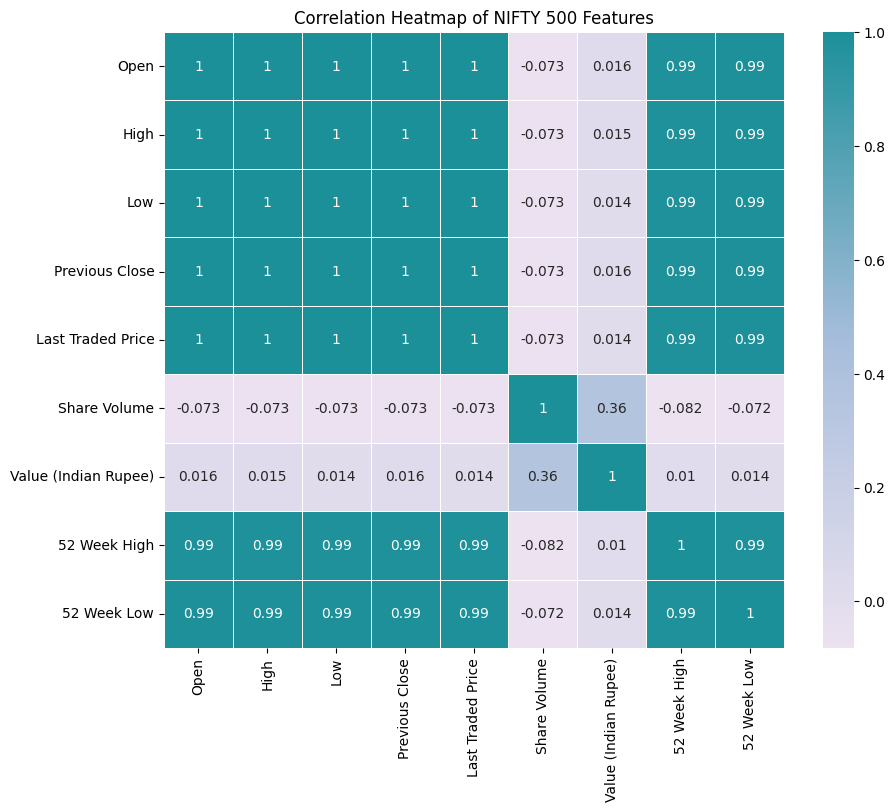

In [154]:
# Select only numerical columns for correlation analysis
numerical_cols = ["Open", "High", "Low", "Previous Close", "Last Traded Price", "Share Volume", "Value (Indian Rupee)", "52 Week High", "52 Week Low"]
numerical_data = df[numerical_cols]

# Calculate correlation matrix
corr_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap =custom_cmap)
plt.title('Correlation Heatmap of NIFTY 500 Features')
plt.show()

### Plot Histgram for Numarical columns:

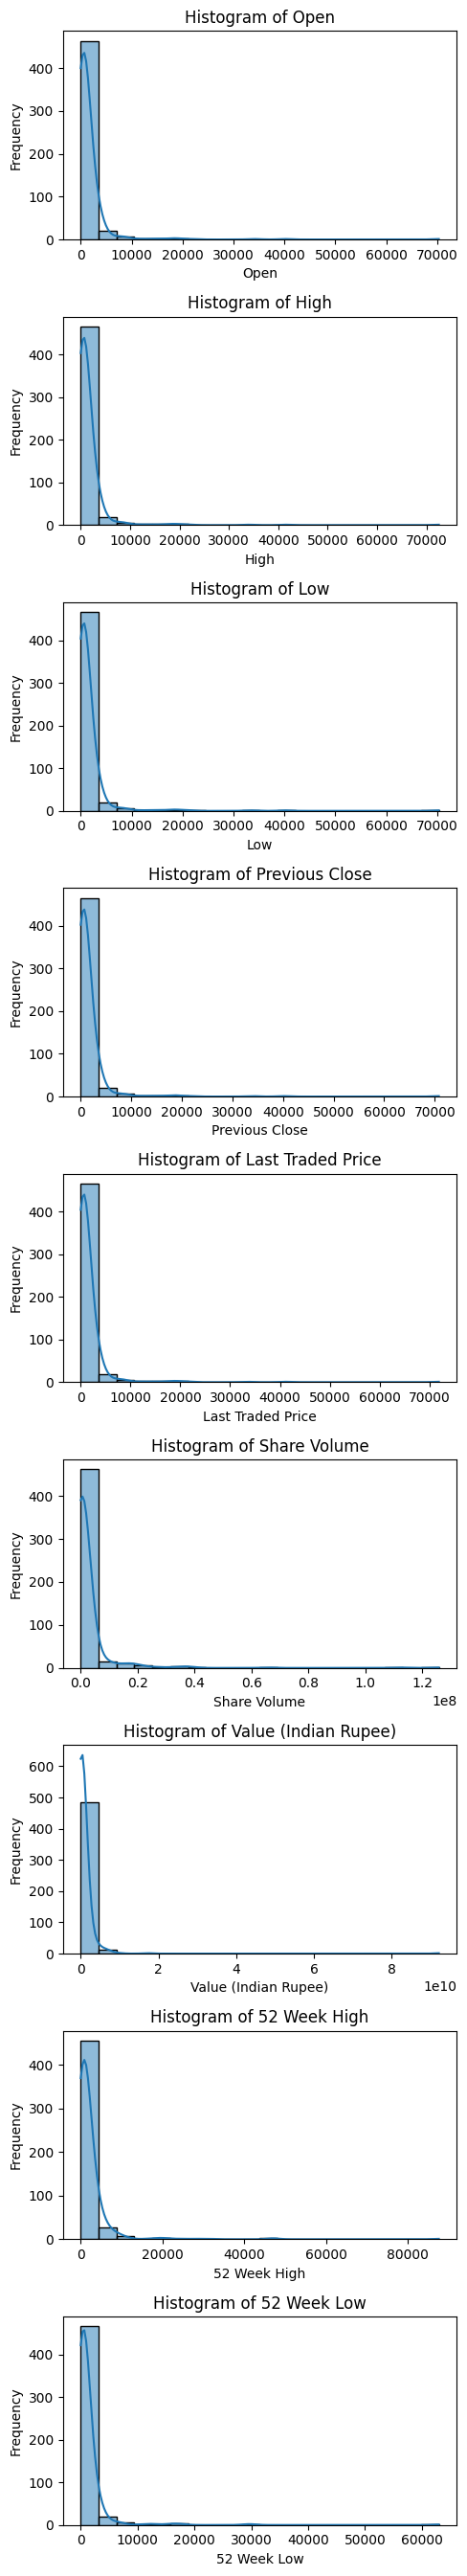

In [156]:
# Define the numerical columns
numerical_cols = ["Open", "High", "Low", "Previous Close", "Last Traded Price", "Share Volume", "Value (Indian Rupee)", "52 Week High", "52 Week Low"]

# Create subplots for all histograms
fig, axs = plt.subplots(nrows=len(numerical_cols), figsize=(5, 3 * len(numerical_cols)))

# Iterate through each numerical column and plot histogram
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=20, palette=custom_cmap, ax=axs[i])
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Detecting Outliers:

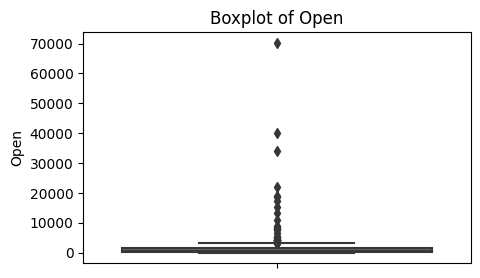

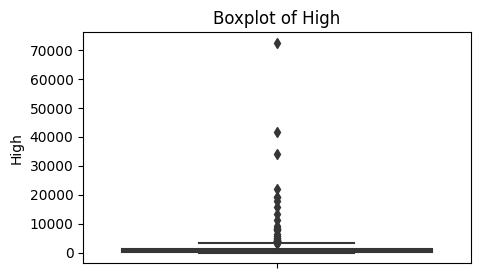

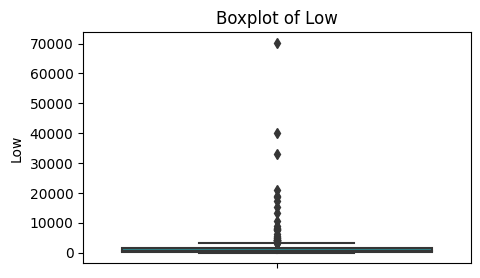

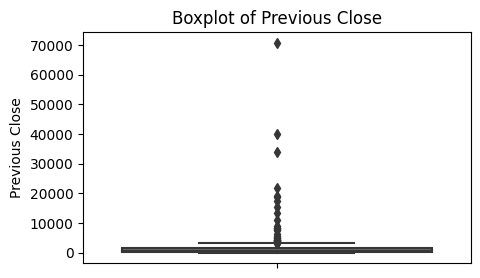

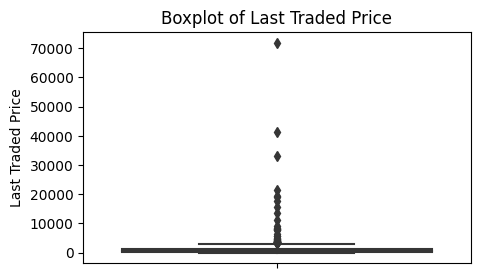

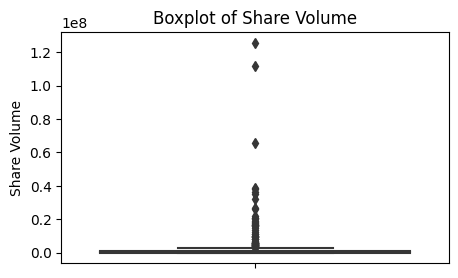

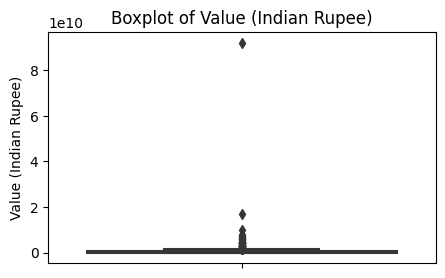

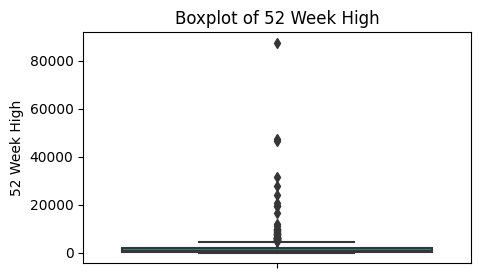

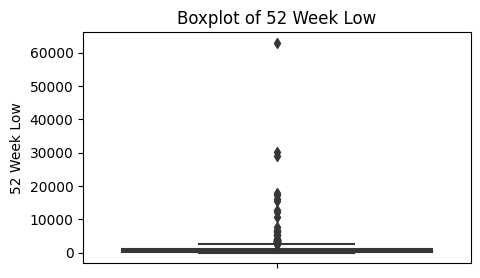

In [163]:
for col in numerical_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[col], color='#1c9099')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)  # Corrected ylabel
    plt.show()

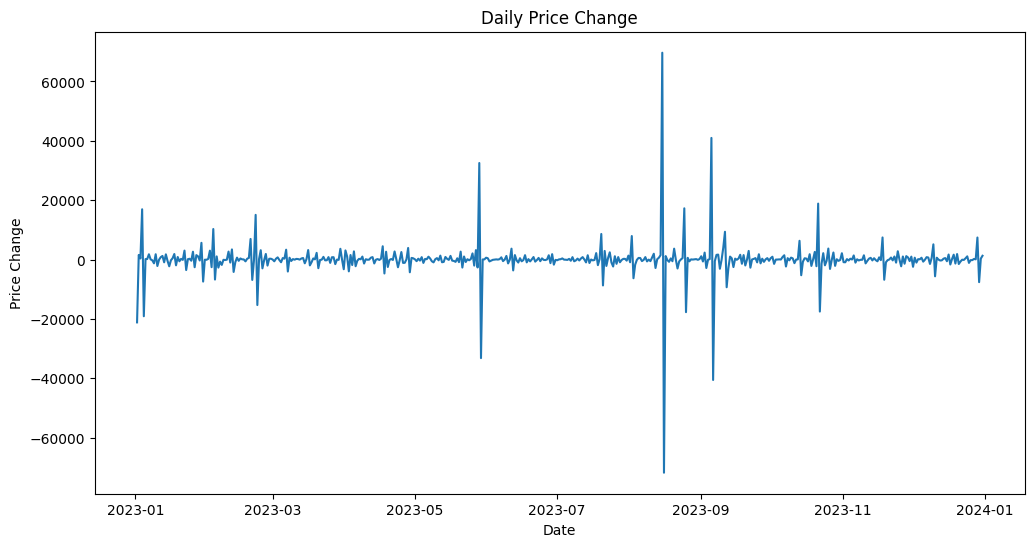

In [164]:
df['Daily Change'] = df['Last Traded Price'].diff()

# Plot Daily Price Change
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily Change'])
plt.title('Daily Price Change')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.show()

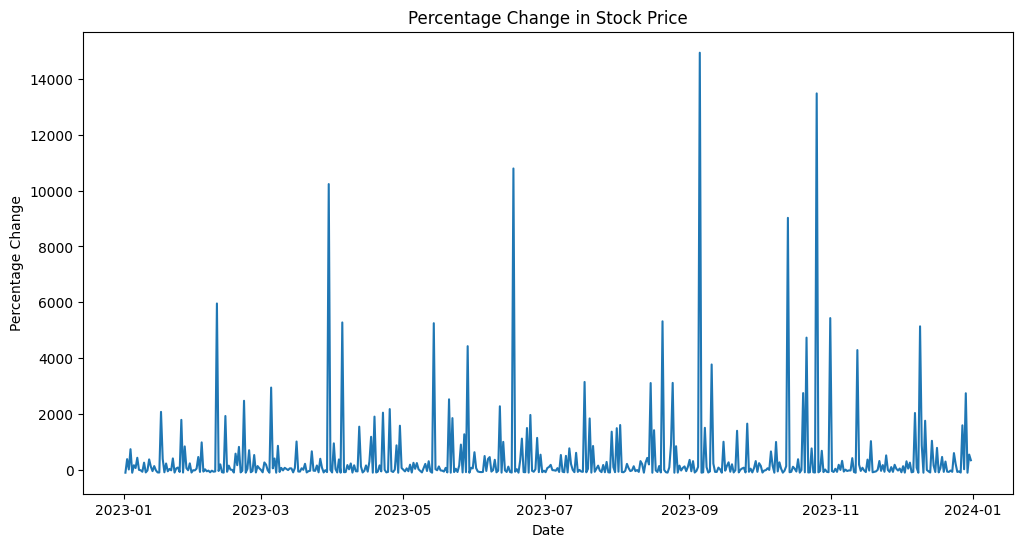

In [165]:
# Calculate Percentage Changes
df['Percentage Change'] = df['Last Traded Price'].pct_change() * 100

# Plot Percentage Changes
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Percentage Change'])
plt.title('Percentage Change in Stock Price')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.show()

In [166]:
industry_stats = df.groupby('Industry').agg({'Last Traded Price': ['mean', 'std']})
print(industry_stats)

                                  Last Traded Price              
                                               mean           std
Industry                                                         
Automobile and Auto Components          4759.355556  13841.907971
Capital Goods                           2009.814583   4858.426811
Chemicals                               1657.769737   1722.062003
Construction                             330.653571    447.555356
Construction Materials                  2673.757692   5194.670708
Consumer Durables                       1242.553571   1018.395670
Consumer Services                        967.933333   1164.863682
Diversified                            11261.400000  14585.632997
Fast Moving Consumer Goods              1703.066667   3703.906957
Financial Services                       812.463068   1469.611729
Forest Materials                         554.875000    355.851488
Healthcare                              1581.162500   2853.792161
Informatio

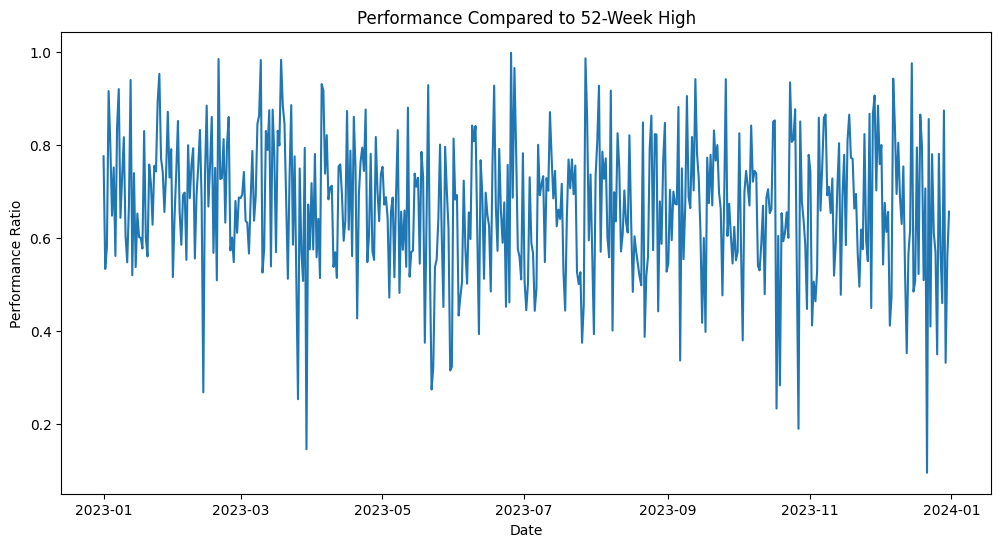

In [167]:
df['Performance'] = df['Last Traded Price'] / df['52 Week High']

# Plot Performance
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Performance'])
plt.title('Performance Compared to 52-Week High')
plt.xlabel('Date')
plt.ylabel('Performance Ratio')
plt.show()

In [175]:
# Define the custom colors
color = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

# Ensure 'Industry' column is of type category
df['Industry'] = df['Industry'].astype('category')

# Plot the countplot with custom colormap
plt.figure(figsize=(30, 10))
sns.countplot(data=df, x='Industry', order=df['Industry'].value_counts().index, palette=color)  
plt.xticks(rotation=90, fontsize=12)  
plt.title('Distribution of Stocks Across Industries', fontsize=16)  
plt.xlabel('Industry', fontsize=14)  
plt.ylabel('Count', fontsize=14)  
plt.show()


TypeError: 'ListedColormap' object is not iterable

<Figure size 3000x1000 with 0 Axes>